In [ ]:
import pickle

# Path to your pickle file
pickle_path = "E:/UT/Term8/LLM/LLMs-For-Rational-Trading/result_df.pkl"

# Load the pickle file
with open(pickle_path, "rb") as f:
    df = pickle.load(f)


Final Total Profit: 302.999755859375

Monthly Stats:
          total_profit  decision_count  buy_count  sell_count  wait_count
month                                                                   
2025-04    -75.400146               9          2           2           4
2025-05    178.399902              21          4           7           8
2025-06    133.500000              20         11           0           7
2025-07     66.500000              21          5           4          10

Weekday vs Weekend Stats:
             total_profit  decision_count  buy_count  sell_count  wait_count
is_weekend                                                                 
False         302.999756              71         22          13          29

Day of Week Stats:
              total_profit  decision_count  buy_count  sell_count  wait_count
day_of_week                                                                 
Friday          55.599854              14          5           2           7


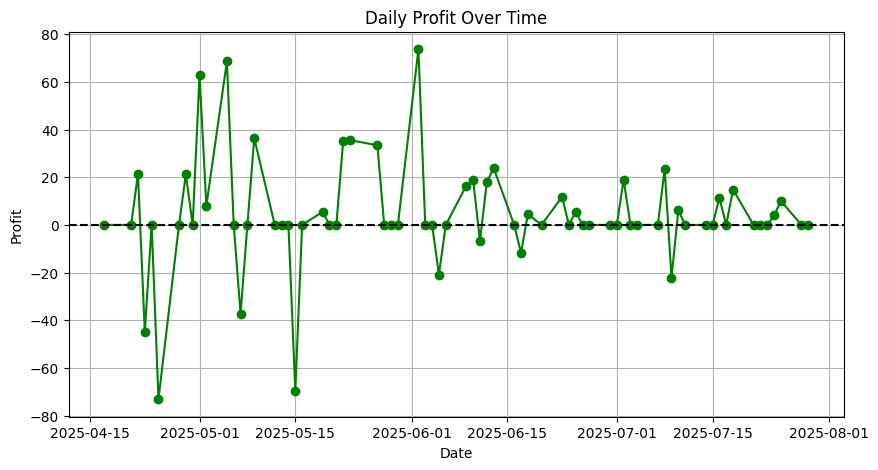

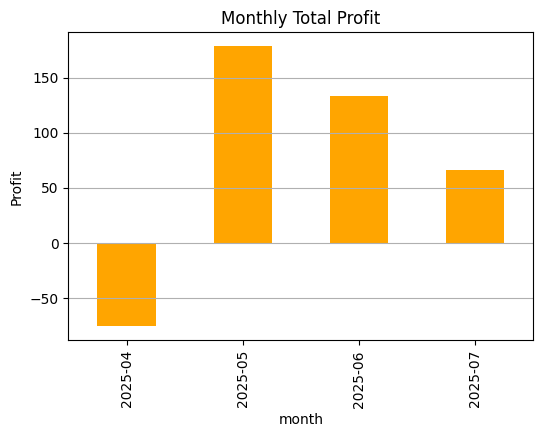

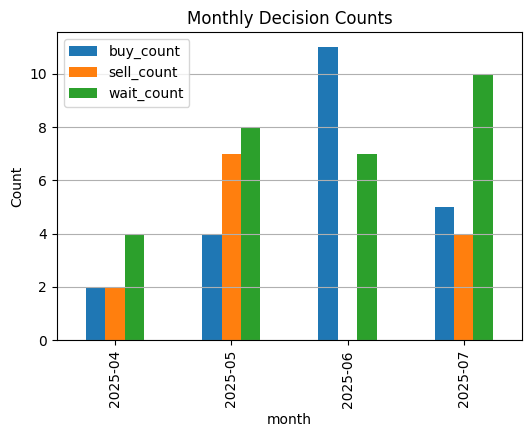

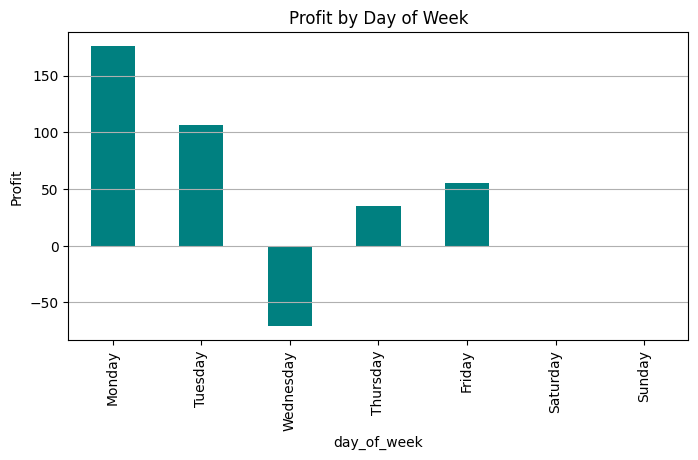

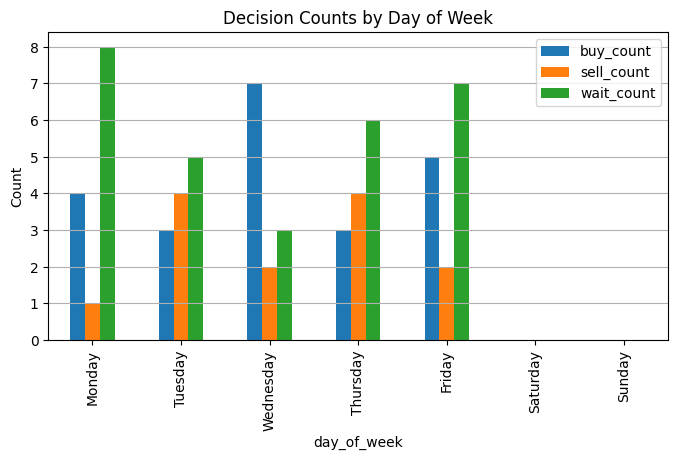

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
df = df.dropna()
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.to_period("M")
df["day_of_week"] = df["date"].dt.day_name()
df["is_weekend"] = df["day_of_week"].isin(["Saturday", "Sunday"])

# Calculate daily profit/loss based on decision
def calc_profit(row):
    if row["final_decision"] == 1:  # sell
        return row["open"] - row["close"]
    elif row["final_decision"] == 2:  # buy
        return row["close"] - row["open"]
    else:
        return 0

df["profit"] = df.apply(calc_profit, axis=1)

# Final total profit
final_profit = df["profit"].sum()
print(f"Final Total Profit: {final_profit}")

# Monthly profit & decision counts
monthly_stats = df.groupby("month").agg(
    total_profit=("profit", "sum"),
    decision_count=("final_decision", "count"),
    buy_count=("final_decision", lambda x: (x == 2).sum()),
    sell_count=("final_decision", lambda x: (x == 1).sum()),
    wait_count=("final_decision", lambda x: (x == 0).sum()),
)

# Weekday vs weekend profit & decision counts
week_part_stats = df.groupby("is_weekend").agg(
    total_profit=("profit", "sum"),
    decision_count=("final_decision", "count"),
    buy_count=("final_decision", lambda x: (x == 2).sum()),
    sell_count=("final_decision", lambda x: (x == 1).sum()),
    wait_count=("final_decision", lambda x: (x == 0).sum()),
)

# Day of week profit & decision counts
dow_stats = df.groupby("day_of_week").agg(
    total_profit=("profit", "sum"),
    decision_count=("final_decision", "count"),
    buy_count=("final_decision", lambda x: (x == 2).sum()),
    sell_count=("final_decision", lambda x: (x == 1).sum()),
    wait_count=("final_decision", lambda x: (x == 0).sum()),
)

print("\nMonthly Stats:\n", monthly_stats)
print("\nWeekday vs Weekend Stats:\n", week_part_stats)
print("\nDay of Week Stats:\n", dow_stats)

# --- Plots ---
plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["profit"], marker="o", color="green")
plt.axhline(0, color="black", linestyle="--")
plt.title("Daily Profit Over Time")
plt.xlabel("Date")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

monthly_stats["total_profit"].plot(kind="bar", figsize=(6, 4), color="orange")
plt.title("Monthly Total Profit")
plt.ylabel("Profit")
plt.grid(axis="y")
plt.show()

monthly_stats[["buy_count", "sell_count", "wait_count"]].plot(kind="bar", figsize=(6, 4))
plt.title("Monthly Decision Counts")
plt.ylabel("Count")
plt.grid(axis="y")
plt.show()


dow_stats = dow_stats.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
dow_stats["total_profit"].plot(kind="bar", figsize=(8, 4), color="teal")
plt.title("Profit by Day of Week")
plt.ylabel("Profit")
plt.grid(axis="y")
plt.show()

dow_stats[["buy_count", "sell_count", "wait_count"]].plot(kind="bar", figsize=(8, 4))
plt.title("Decision Counts by Day of Week")
plt.ylabel("Count")
plt.grid(axis="y")
plt.show()